## Allsides Web scraper in Graphs/Tabels

Becoming interested in web scraping I started off simple with parsing out data from a table. The data I collected consisted of news source, where they fall in the political specturm, and if people agree if where they fall on the specturm is true. 

In [6]:
from matplotlib import pyplot as plt
import pandas as pd 
import json

## Data in a table:



In [13]:
df = pd.read_json(open('allside.json', 'r'))
df.set_index('News Source', inplace=True)
df.head()

,AllSides Bias Rating,News Media Info,Agree,Disagree,Ratio,Community feedback,News Source Site,Established,Owned by
News Source,,,,,,,,,
ABC News (Online),left-center,https://www.allsides.com/news-source/abc-news-...,23941,13565,1.765,Agree,http://abcnews.go.com/,6/15/1945,The Walt Disney Company
AlterNet,left,https://www.allsides.com/news-source/alternet-...,8305,1844,4.504,Absolutely agree,http://www.alternet.org/,,Independent Media Institute
Associated Press,center,https://www.allsides.com/news-source/associate...,16293,12054,1.352,Somewhat agree,https://apnews.com/,1846,"Cooperatively owned by 1,500 member news outlets"
BBC News,center,https://www.allsides.com/news-source/bbc-news-...,19994,17999,1.111,Somewhat agree,http://www.bbc.com/,10/18/1922,British Public
Bloomberg,left-center,https://www.allsides.com/news-source/bloomberg...,10922,16809,0.650,Disagree,http://www.bloomberg.com/,1990,Bloomberg LP (Michael Bloomberg CEO)


In [14]:
dfCopy10 = df.head(10).copy() #grabbing the first 10 and putting them into a variable 

In [21]:
plt.style.use('seaborn-dark') # the style of the graph 

TypeError: bar() missing 1 required positional argument: 'height'

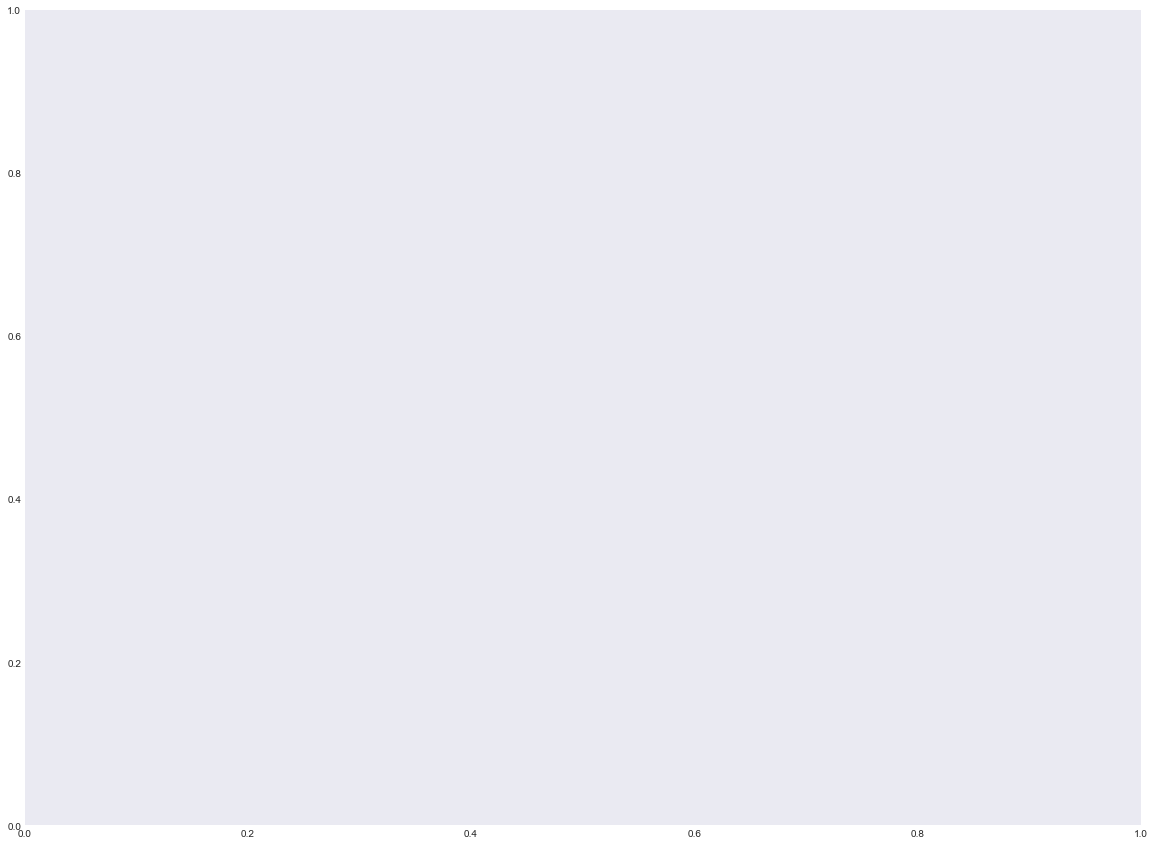

In [38]:
fig, ax = plt.subplots(figsize=(20, 15)) # the dimensions of the x-axis and y-axis 

plt.title('Allsides Rating vs. Community Feedback', fontsize=20) 
plt.tight_layout()
plt.grid(True)
plt.show() #To make the plot appear